# **Distribución t-student**

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:
<br><br>
Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.
<br><br>
Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## DataFrame

In [34]:
df = {'A': [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23],
      'B': [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]}
df = pd.DataFrame(df)
df.head()

,A,B
0,20,19
1,25,18
2,22,21
3,23,20
4,28,23


## Estandarización de los datos

In [35]:
# Tipo de jugo A
media_A = df['A'].mean()
n_A = len(df['A'])
desv_est_A = df['A'].std()

In [36]:
df_estandarizadoA = ((df['A']-media_A)/(desv_est_A/math.sqrt(n_A)))
df_estandarizadoA.head()

0   -10.872316
1     2.948425
2    -5.344020
3    -2.579872
4    11.240869
Name: A, dtype: float64

In [37]:
# Tipo de jugo B
media_B = df['B'].mean()
n_B = len(df['B'])
desv_est_B = df['B'].std()

In [38]:
df_estandarizadoB = ((df['B']-media_B)/(desv_est_B/math.sqrt(n_B)))
df_estandarizadoB.head()

0   -4.806510
1   -8.159890
2    1.900248
3   -1.453131
4    8.607007
Name: B, dtype: float64

## Gráfica QQ-plot

Text(0.5, 1.0, 'QQ-Plot Tipo A')

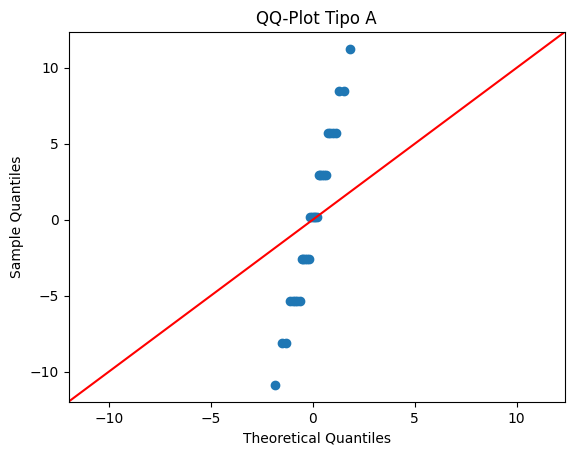

In [39]:
sm.qqplot(df_estandarizadoA, line='45')
plt.title("QQ-Plot Tipo A")

Text(0.5, 1.0, 'QQ-Plot Tipo B')

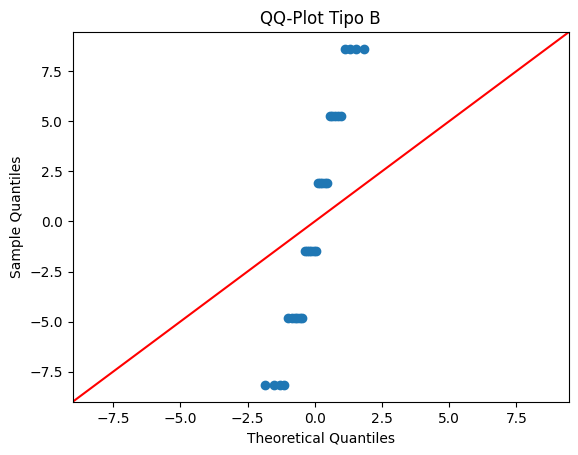

In [40]:
sm.qqplot(df_estandarizadoB, line='45')
plt.title("QQ-Plot Tipo B")

## Test de Kolmogorov Smirnov

In [41]:
# Tipo de jugo A
kstest_result = stats.kstest(df_estandarizadoA, 'norm')
print("Estadístico de prueba:", kstest_result.statistic)
print("Valor p:", kstest_result.pvalue)
print("Resultado del test:", kstest_result.pvalue<=0.05)

Estadístico de prueba: 0.42839148113992026
Valor p: 1.6245194483008648e-05
Resultado del test: True


In [42]:
# Tipo de jugo B
kstest_result = stats.kstest(df_estandarizadoB, 'norm')
print("Estadístico de prueba:", kstest_result.statistic)
print("Valor p:", kstest_result.pvalue)
print("Resultado del test:", kstest_result.pvalue<=0.05)

Estadístico de prueba: 0.4602396467922807
Valor p: 2.465171784639058e-06
Resultado del test: True


Los resultados del test de Kolmogorov Smirnov indican que se rechaza la hipótesis nula.

## Intervalo de confianza

In [43]:
# Nivel de confianza 99%
confianza = 0.99

In [44]:
# Tipo de jugo A

grado_libertadA = n_A - 1

valor_criticoA = stats.t.ppf((1+confianza)/2, grado_libertadA)

errorA = valor_criticoA *(desv_est_A/np.sqrt(n_A))

inter_confianzaA = (media_A-errorA, media_A+errorA)
print("Intervalo de Confianza:", inter_confianzaA)

Intervalo de Confianza: (22.936141535685323, 24.930525130981344)


In [45]:
# Tipo de jugo B

grado_libertadB = n_B - 1

valor_criticoB = stats.t.ppf((1+confianza)/2, grado_libertadB)

errorB = valor_criticoB *(desv_est_B/np.sqrt(n_B))

inter_confianzaB = (media_B-errorB, media_B+errorB)
print("Intervalo de Confianza:", inter_confianzaB)

Intervalo de Confianza: (19.611360740938043, 21.255305925728624)


Intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de los jugos:
<br>
<br>
Tipo A: [22.9361, 24.9305]
<br>
<br>
Tipo B: [19.6113, 21.2553]